In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("\nCustomer Data Analysis for India\n")


Customer Data Analysis for India



In [3]:
# STEP 1: LOAD DATASET

print("== Load Dataset ==\n")
df = pd.read_csv("customer_dataset_new (1).csv")
print("Original Dataset Shape:", df.shape)

== Load Dataset ==

Original Dataset Shape: (500, 6)


In [4]:
# STEP 2: DATA CLEANING

print("\n== Missing Values Before Cleaning ==\n")
print(df.isnull().sum())


== Missing Values Before Cleaning ==

customer_id         0
gender              0
age                 0
payment_method      0
monthly_spending    0
visits_per_month    0
dtype: int64


In [5]:
# Numeric columns → mean
df["age"] = df["age"].fillna(df["age"].mean())
df["monthly_spending"] = df["monthly_spending"].fillna(df["monthly_spending"].mean())
df["visits_per_month"] = df["visits_per_month"].fillna(df["visits_per_month"].mean())

In [6]:
# Categorical columns → mode
df["gender"] = df["gender"].fillna(df["gender"].mode()[0])
df["payment_method"] = df["payment_method"].fillna(df["payment_method"].mode()[0])

In [7]:
# Remove duplicates
df = df.drop_duplicates()

print("\nDataset Shape After Cleaning:", df.shape)


Dataset Shape After Cleaning: (500, 6)


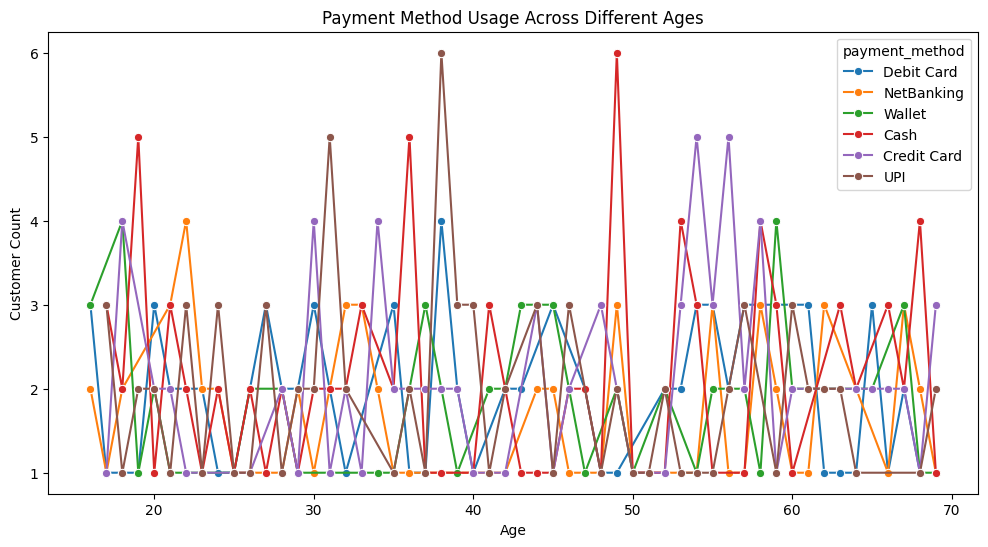

In [8]:
# STEP 3: VISUALIZATIONS

# line chart : 

age_payment_counts = df.groupby(["age","payment_method"])["customer_id"].count().reset_index()
age_payment_counts.rename(columns={"customer_id":"count"}, inplace=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=age_payment_counts, x="age", y="count", hue="payment_method", marker="o")
plt.title("Payment Method Usage Across Different Ages")
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_10740\2756729227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x="gender", y="customer_id", palette="Set2")


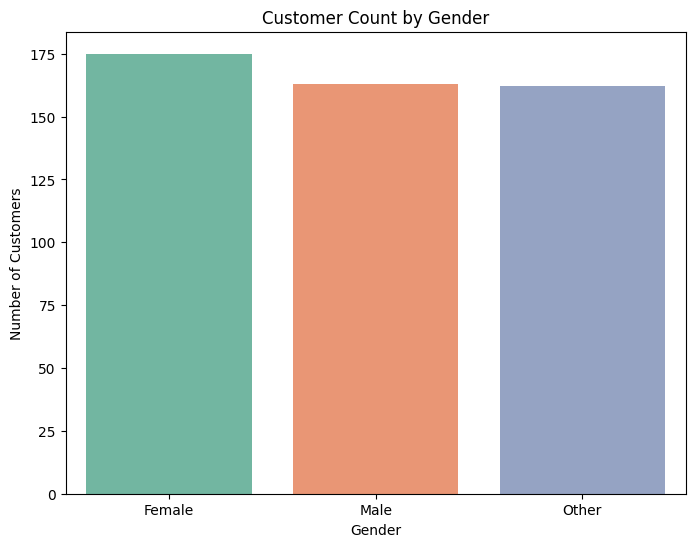

In [9]:
# Bar Chart : 

gender_counts = df.groupby("gender")["customer_id"].count().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=gender_counts, x="gender", y="customer_id", palette="Set2")
plt.title("Customer Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

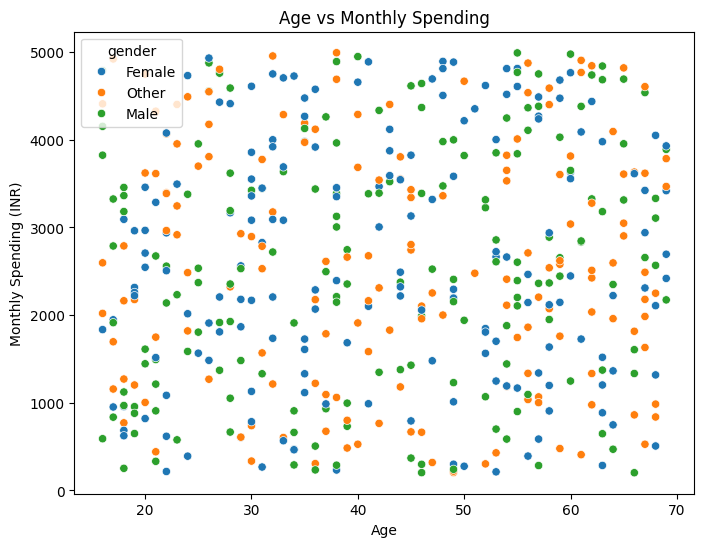

In [10]:
# scatter chart :

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="age", y="monthly_spending", hue="gender")
plt.title("Age vs Monthly Spending")
plt.xlabel("Age")
plt.ylabel("Monthly Spending (INR)")
plt.show()

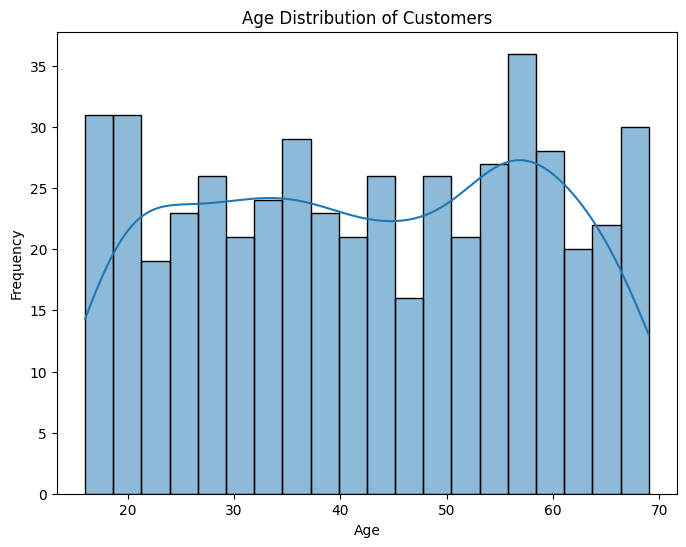

In [11]:
#  hiastogrm : 

plt.figure(figsize=(8,6))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

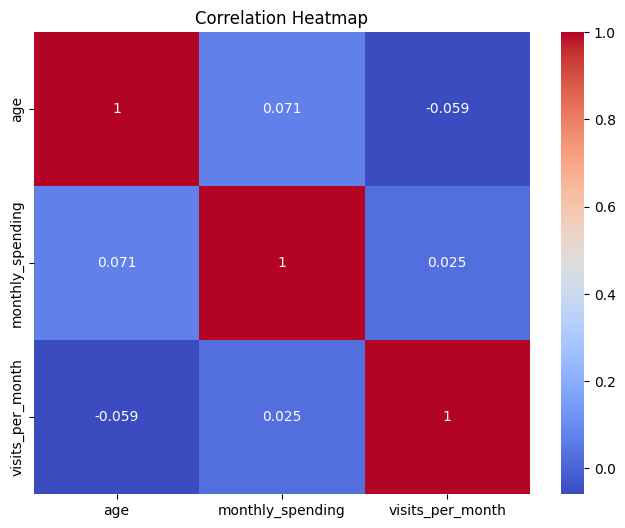

In [12]:
#  heatmap :

plt.figure(figsize=(8,6))
sns.heatmap(df[["age","monthly_spending","visits_per_month"]].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# STEP 4: FINAL SUMMARY

print("\n===== FINAL SUMMARY REPORT =====")

print("Total Records:", len(df))

print("Average Age:", round(df["age"].mean(), 2))
print("Average Monthly Spending (₹):", round(df["monthly_spending"].mean(), 2))
print("Average Visits per Month:", round(df["visits_per_month"].mean(), 2))

print("\nMost Common Gender:", df["gender"].mode()[0])
print("Most Used Payment Method:", df["payment_method"].mode()[0])

print("\nHighest Spending Customer ID:",
      df.loc[df["monthly_spending"].idxmax(), "customer_id"])

print("Customer With Most Visits:",
      df.loc[df["visits_per_month"].idxmax(), "customer_id"])

print("\nGender with Highest Average Spending:",
      df.groupby("gender")["monthly_spending"].mean().idxmax())

print("Payment Method with Highest Average Spending:",
      df.groupby("payment_method")["monthly_spending"].mean().idxmax())


===== FINAL SUMMARY REPORT =====
Total Records: 500
Average Age: 42.56
Average Monthly Spending (₹): 2579.46
Average Visits per Month: 9.87

Most Common Gender: Female
Most Used Payment Method: Cash

Highest Spending Customer ID: 1040
Customer With Most Visits: 1013

Gender with Highest Average Spending: Female
Payment Method with Highest Average Spending: Debit Card
